In [39]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('../data/survey_results_public.csv')

(64461, 61)

In [11]:
print('df has {} rows and {} columns'.format(*df.shape))

df has 64461 rows and 61 columns


In [12]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [13]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [24]:
categoricals={}
for col, col_type in df.dtypes.iteritems(): 
    if col_type=='O':
        categoricals[col]=df[col].nunique()
#         print(f'{col} is {col_type}')
        
categoricals

{'MainBranch': 5,
 'Hobbyist': 2,
 'Age1stCode': 63,
 'CompFreq': 3,
 'Country': 183,
 'CurrencyDesc': 142,
 'CurrencySymbol': 141,
 'DatabaseDesireNextYear': 3193,
 'DatabaseWorkedWith': 2808,
 'DevType': 8269,
 'EdLevel': 9,
 'Employment': 7,
 'Ethnicity': 208,
 'Gender': 7,
 'JobFactors': 230,
 'JobSat': 5,
 'JobSeek': 3,
 'LanguageDesireNextYear': 16243,
 'LanguageWorkedWith': 14256,
 'MiscTechDesireNextYear': 5216,
 'MiscTechWorkedWith': 2730,
 'NEWCollabToolsDesireNextYear': 1277,
 'NEWCollabToolsWorkedWith': 1153,
 'NEWDevOps': 3,
 'NEWDevOpsImpt': 5,
 'NEWEdImpt': 5,
 'NEWJobHunt': 2172,
 'NEWJobHuntResearch': 63,
 'NEWLearn': 4,
 'NEWOffTopic': 3,
 'NEWOnboardGood': 3,
 'NEWOtherComms': 2,
 'NEWOvertime': 5,
 'NEWPurchaseResearch': 63,
 'NEWPurpleLink': 4,
 'NEWSOSites': 61,
 'NEWStuck': 444,
 'OpSys': 4,
 'OrgSize': 9,
 'PlatformDesireNextYear': 7471,
 'PlatformWorkedWith': 6287,
 'PurchaseWhat': 3,
 'Sexuality': 14,
 'SOAccount': 3,
 'SOComm': 6,
 'SOPartFreq': 6,
 'SOVisitF

In [74]:
ohe.get_feature_names()

array(['x0_Man',
       'x0_Man;Non-binary, genderqueer, or gender non-conforming',
       'x0_Non-binary, genderqueer, or gender non-conforming', 'x0_Woman',
       'x0_Woman;Man',
       'x0_Woman;Man;Non-binary, genderqueer, or gender non-conforming',
       'x0_Woman;Non-binary, genderqueer, or gender non-conforming'],
      dtype=object)

In [75]:
df['Gender'].str.get_dummies(sep=';')

,Man,"Non-binary, genderqueer, or gender non-conforming",Woman
0,1,0,0
1,0,0,0
2,0,0,0
3,1,0,0
4,1,0,0
...,...,...,...
64456,0,0,0
64457,0,0,0
64458,0,0,0
64459,0,0,0


In [53]:
for each_col in categoricals: 
    if categoricals[each_col]<100: 
        print(f'{each_col} options: {df[each_col].unique()}')
        print('='*20)

MainBranch options: ['I am a developer by profession' 'I code primarily as a hobby'
 'I used to be a developer by profession, but no longer am'
 'I am not primarily a developer, but I write code sometimes as part of my work'
 'I am a student who is learning to code' nan]
Hobbyist options: ['Yes' 'No' nan]
Age1stCode options: ['13' '19' '15' '18' '16' '14' '12' '20' '42' '8' '25' '22' '30' '17' '21'
 '10' '46' '9' '7' '11' '6' nan '31' '29' '5' 'Younger than 5 years' '28'
 '38' '23' '27' '41' '24' '53' '26' '35' '32' '40' '33' '36' '54' '48'
 '56' '45' '44' '34' 'Older than 85' '39' '51' '68' '50' '37' '47' '43'
 '52' '85' '64' '55' '58' '49' '76' '72' '73' '83' '63']
CompFreq options: ['Monthly' nan 'Yearly' 'Weekly']
EdLevel options: ['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'
 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)' nan
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'
 'Professional degree (JD, MD, etc.)'
 'Some college/university st

In [44]:
comp_cols=['CompFreq','CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc','CurrencySymbol']
comp_df=df[comp_cols].dropna()
comp_df[comp_df['CompFreq']=='Weekly']

,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol
85,Weekly,2.000000e+03,108100.0,France,European Euro,EUR
121,Weekly,1.200000e+05,2000000.0,United States,United States dollar,USD
132,Weekly,3.250000e+03,210050.0,United Kingdom,Pound sterling,GBP
173,Weekly,7.600000e+02,41100.0,Netherlands,European Euro,EUR
191,Weekly,1.200000e+05,2000000.0,United States,United States dollar,USD
...,...,...,...,...,...,...
63762,Weekly,1.600000e+03,80000.0,United States,United States dollar,USD
63925,Weekly,8.740000e+09,1000000.0,Afghanistan,Afghan afghani,AFN
63993,Weekly,5.521171e+09,1000000.0,Afghanistan,Afghan afghani,AFN
64035,Weekly,6.600000e+04,2000000.0,United States,United States dollar,USD


(-2000.001, 100000.0]     26847
(100000.0, 200000.0]       5603
(200000.0, 300000.0]        686
(900000.0, 1000000.0]       338
(1900000.0, 2000000.0]      265
(300000.0, 400000.0]        235
(400000.0, 500000.0]        159
(500000.0, 600000.0]        154
(600000.0, 700000.0]        133
(700000.0, 800000.0]        110
(800000.0, 900000.0]         93
(1400000.0, 1500000.0]       22
(1100000.0, 1200000.0]       22
(1000000.0, 1100000.0]       21
(1200000.0, 1300000.0]       17
(1700000.0, 1800000.0]       14
(1300000.0, 1400000.0]       13
(1600000.0, 1700000.0]       13
(1500000.0, 1600000.0]        6
(1800000.0, 1900000.0]        5
Name: ConvertedComp, dtype: int64

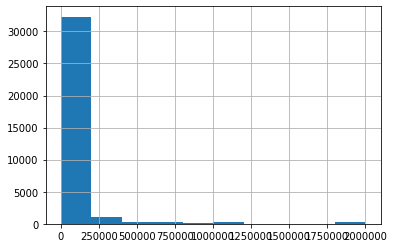

In [52]:
# comp_df[comp_df['ConvertedComp']<500000]['ConvertedComp'].hist()
# comp_df[comp_df['ConvertedComp']<500000]['ConvertedComp'].value_counts(bins=10)
comp_df['ConvertedComp'].hist()
comp_df['ConvertedComp'].value_counts(bins=20)

In [35]:
currency_api_url='https://api.exchangeratesapi.io/latest?base=USD'
response=requests.get(currency_api_url)
currency_conv=response.json()['rates']
currency_conv

{'CAD': 1.2857142857,
 'HKD': 7.7506373879,
 'ISK': 125.0925240563,
 'PHP': 48.0549387285,
 'DKK': 6.1213093182,
 'HUF': 294.9008964553,
 'CZK': 21.8093593223,
 'GBP': 0.7425117197,
 'RON': 4.0073196809,
 'SEK': 8.4363845711,
 'IDR': 14164.2980508265,
 'INR': 73.7523645037,
 'BRL': 5.1615264413,
 'RUB': 74.0750884119,
 'HRK': 6.2024015133,
 'JPY': 103.9888148696,
 'THB': 30.1603750308,
 'CHF': 0.8900402994,
 'EUR': 0.8224360556,
 'MYR': 4.0600378321,
 'BGN': 1.6085204375,
 'TRY': 7.7832058557,
 'CNY': 6.5318693972,
 'NOK': 8.7670038654,
 'NZD': 1.4190311703,
 'ZAR': 15.1882556131,
 'USD': 1.0,
 'MXN': 19.828193108,
 'SGD': 1.3328398717,
 'AUD': 1.3477259643,
 'ILS': 3.2667160128,
 'KRW': 1086.109055021,
 'PLN': 3.6819639773}

In [37]:
#df['Comp_USD']=
df.dropna()
df.apply(lambda x: x['CompTotal']/currency_conv['CurrencySymbol'])# if x['CurrencySymbol'] != 'USD')

KeyError: ('CompTotal', 'occurred at index Respondent')